# Different Types of Regression Visualization

# 1. Simple Linear Regression

**1. Simple Linear Regression:**
Data Characteristics:
There is a clear, linear relationship between the dependent and independent variables.

**Example Data Types:**
Salary vs. Years of Experience
Temperature vs. Ice Cream Sales


**Key Features:**
- Assumes a linear relationship between the dependent and independent variables.
- One independent variable is used to predict the dependent variable.

**Formula:**
\[ y = \beta_0 + \beta_1 \cdot X + \epsilon \]

- \( y \) is the dependent variable.
- \( X \) is the independent variable.
- \( \beta_0 \) is the y-intercept.
- \( \beta_1 \) is the slope.
- \( \epsilon \) is the error term.

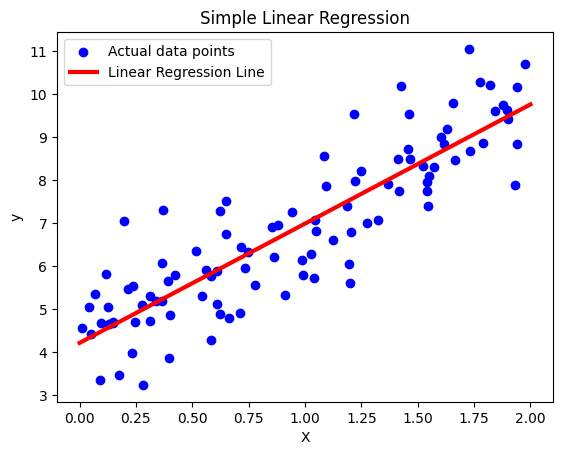

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate random data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
X_new = np.array([[0], [2]])
y_pred = model.predict(X_new)

# Plot the data points and regression line
plt.scatter(X, y, color='blue', label='Actual data points')
plt.plot(X_new, y_pred, color='red', linewidth=3, label='Linear Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Simple Linear Regression')
plt.savefig('Simple_Linear_Regression.png')
plt.show()


# 2. Polynomial Regression

**2. Polynomial Regression:**
Data Characteristics:
The relationship between variables is nonlinear, and a higher-degree polynomial might capture the 
pattern better.

**Example Data Types:**
Price of a House vs. Size
Speed vs. Stopping Distance in a Car


**Key Features:**
- Can model relationships with higher-degree polynomials.
- Allows for more flexible curve fitting.

**Formula:**
\[ y = \beta_0 + \beta_1 \cdot X + \beta_2 \cdot X^2 + \ldots + \beta_n \cdot X^n + \epsilon \]

- \( n \) is the degree of the polynomial.


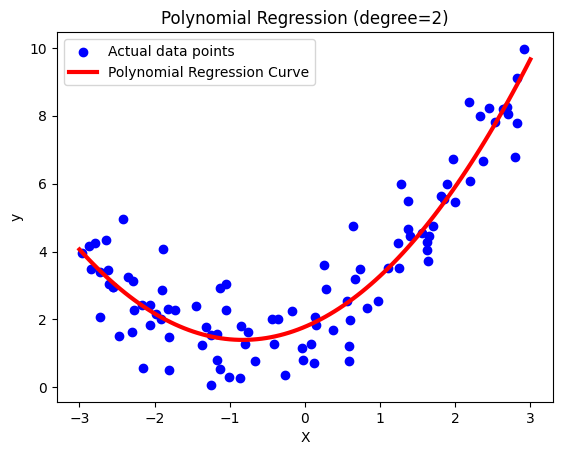

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate random data
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

# Transform features to include polynomial terms up to degree 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Fit linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Generate points for plotting the curve
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)

# Plot the data points and polynomial regression curve
plt.scatter(X, y, color='blue', label='Actual data points')
plt.plot(X_new, y_new, color='red', linewidth=3, label='Polynomial Regression Curve')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression (degree=2)')
plt.savefig('Polynomial_Regression.png')
plt.show()


# 3. Ridge Regression

**3. Ridge Regression:**
Data Characteristics:
There is multicollinearity (high correlation) among predictor variables.
Presence of many features where some might be correlated.

**Example Data Types:**
Predicting Housing Prices with features like square footage, number of bedrooms, and number of bathrooms.



**Key Features:**
- Combats multicollinearity in multiple regression.
- Adds a penalty term to the least squares method.

**Formula:**
\[ \text{Cost function} = \sum_{i=1}^{m} (y_i - (\beta_0 + \beta_1 \cdot X_{1i} + \beta_2 \cdot X_{2i} + \ldots))^2 + \alpha \sum_{j=1}^{n} \beta_j^2 \]

- \( \alpha \) is the regularization strength.




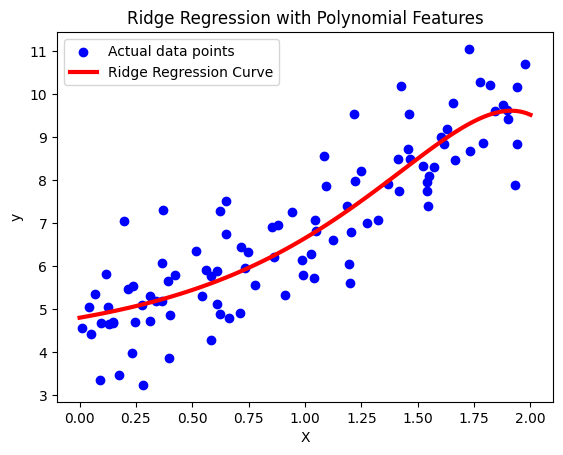

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate random data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Ridge regression with polynomial features
degree = 10
alpha = 1  # Regularization strength
model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
model.fit(X, y)

# Plot the data points and Ridge regression curve
X_new = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = model.predict(X_new)
plt.scatter(X, y, color='blue', label='Actual data points')
plt.plot(X_new, y_pred, color='red', linewidth=3, label='Ridge Regression Curve')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Ridge Regression with Polynomial Features')
plt.savefig('Ridge_Regression.png')
plt.show()


# 4. Lasso Regression

**Lasso Regression:**
Data Characteristics:
Feature selection is crucial, and you want to shrink some coefficients to exactly zero.
Large number of features, and you suspect that only a small subset is relevant.

**Example Data Types:**
Predicting Customer Churn with various customer attributes.


**Key Features:**
- Similar to Ridge but uses the absolute values of coefficients.
- Encourages sparsity in the model.

**Formula:**
\[ \text{Cost function} = \sum_{i=1}^{m} (y_i - (\beta_0 + \beta_1 \cdot X_{1i} + \beta_2 \cdot X_{2i} + \ldots))^2 + \alpha \sum_{j=1}^{n} |\beta_j| \]

- \( \alpha \) is the regularization strength.



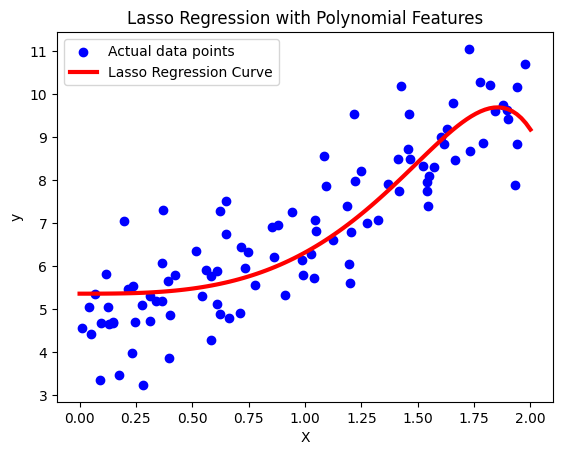

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate random data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Lasso regression with polynomial features
degree = 10
alpha = 0.1  # Regularization strength
model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
model.fit(X, y)

# Plot the data points and Lasso regression curve
X_new = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = model.predict(X_new)
plt.scatter(X, y, color='blue', label='Actual data points')
plt.plot(X_new, y_pred, color='red', linewidth=3, label='Lasso Regression Curve')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Lasso Regression with Polynomial Features')
plt.savefig('Lasso_Regression.png')
plt.show()


# 5. Support Vector Regression (SVR)

**Support Vector Regression (SVR):**
Data Characteristics:
Nonlinear relationships with a limited dataset.
You want to introduce flexibility in the choice of the kernel function.

**Example Data Types:**
Stock Prices prediction based on historical market data.



**Key Features:**
- Utilizes support vector machines for regression.
- Includes a margin of tolerance.

**Formula:**
\[ \min_{w, b, \zeta, \zeta^*} \frac{1}{2} w^T \cdot w + C \sum_{i=1}^{m} (\zeta_i + \zeta_i^*) \]




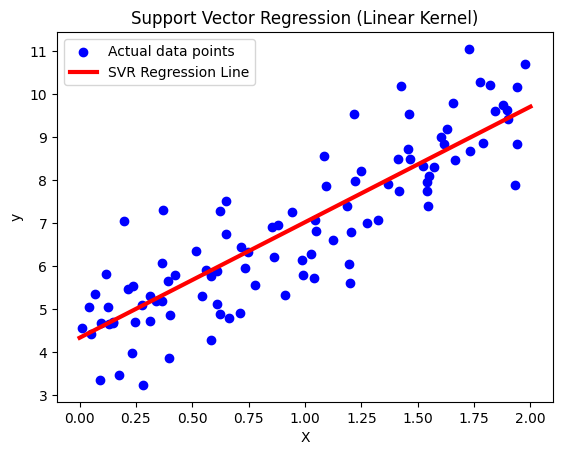

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Generate random data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Support Vector Regression
model = SVR(kernel='linear', C=100)
model.fit(X, y.ravel())

# Plot the data points and SVR regression line
X_new = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = model.predict(X_new)
plt.scatter(X, y, color='blue', label='Actual data points')
plt.plot(X_new, y_pred, color='red', linewidth=3, label='SVR Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Support Vector Regression (Linear Kernel)')
plt.savefig('Support_Vector.png')
plt.show()

# 6. Decision Tree Regression

**Decision Tree Regression:**
Data Characteristics:
The relationship between variables is nonlinear and complex.
You want an interpretable model.

**Example Data Types:**
Predicting Risk of Heart Disease with various health factors.



**Key Features:**
- Makes predictions based on a tree-like model.
- Splits the data into subsets based on feature values.

**Formula:**
\[ \hat{y} = \text{average}(\text{target values in leaf node}) \]



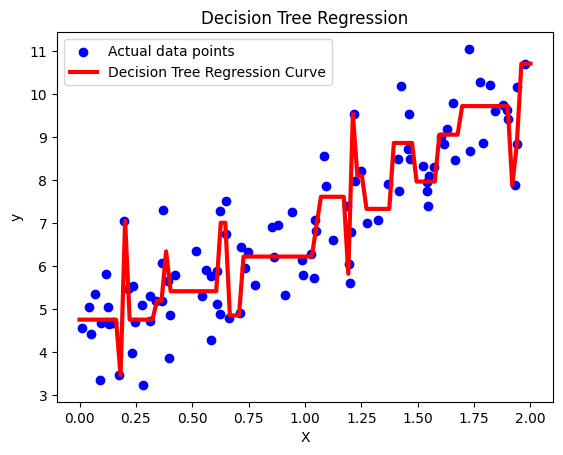

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Generate random data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Decision Tree Regression
model = DecisionTreeRegressor(max_depth=5)
model.fit(X, y)

# Plot the data points and Decision Tree regression curve
X_new = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = model.predict(X_new)
plt.scatter(X, y, color='blue', label='Actual data points')
plt.plot(X_new, y_pred, color='red', linewidth=3, label='Decision Tree Regression Curve')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Decision Tree Regression')
plt.savefig('Decission_Tree.png')
plt.show()


# 7. Bayesian Ridge Regression

**Bayesian Ridge Regression:**
Data Characteristics:
You want to incorporate prior knowledge or beliefs about the parameters.
You want uncertainty estimates for predictions.

**Example Data Types:**
Predicting Temperature based on historical weather data.



**Key Features:**
- Uses Bayesian methods to estimate parameters.
- Provides uncertainty estimates for predictions.

**Formula:**
\[ P(\theta | X, y) \propto P(y | X, \theta) P(\theta) \]




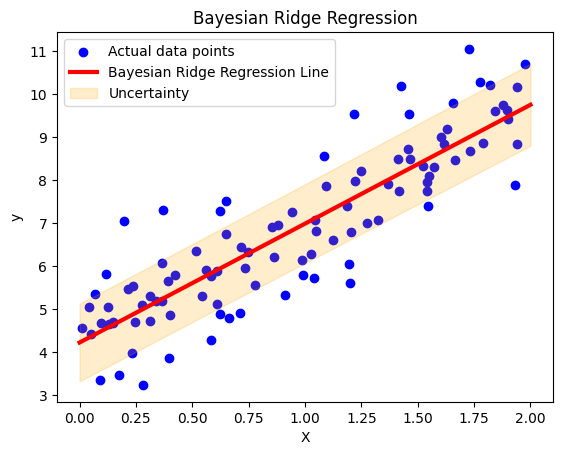

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge

# Generate random data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Bayesian Ridge Regression
model = BayesianRidge()
model.fit(X, y.ravel())

# Plot the data points and Bayesian Ridge regression line
X_new = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred, y_std = model.predict(X_new, return_std=True)
plt.scatter(X, y, color='blue', label='Actual data points')
plt.plot(X_new, y_pred, color='red', linewidth=3, label='Bayesian Ridge Regression Line')
plt.fill_between(X_new.ravel(), y_pred - y_std, y_pred + y_std, color='orange', alpha=0.2, label='Uncertainty')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Bayesian Ridge Regression')
plt.savefig('Bayesian_Ridge.png')
plt.show()


# 8. Random Forest Regression

**Random Forest Regression:**
Data Characteristics:
You want to reduce overfitting and improve generalization.
You have a large dataset with many features.

**Example Data Types:**
Predicting Crop Yield based on various agricultural factors.



**Key Features:**
- Ensemble method using multiple decision trees.
- Reduces overfitting and improves generalization.

**Formula:**
\[ \hat{y} = \frac{1}{N} \sum_{i=1}^{N} \text{Tree}_i(X) \]

- \( N \) is the number of trees in the forest.


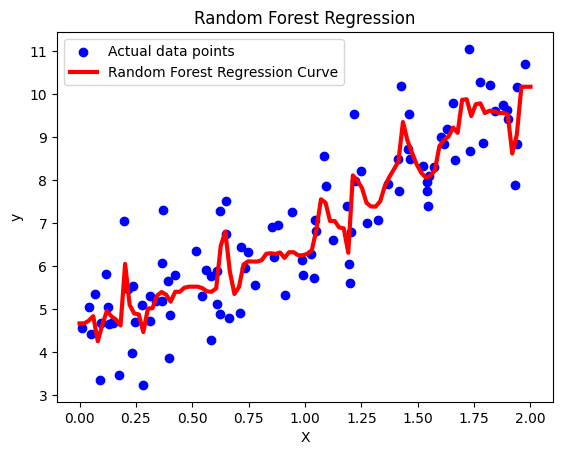

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Generate random data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Random Forest Regression
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X, y.ravel())

# Plot the data points and Random Forest regression curve
X_new = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = model.predict(X_new)
plt.scatter(X, y, color='blue', label='Actual data points')
plt.plot(X_new, y_pred, color='red', linewidth=3, label='Random Forest Regression Curve')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Random Forest Regression')
plt.savefig('Random_Forest.png')
plt.show()


**General Considerations:**

**Data Size:**

Large Datasets: Random Forest, Ridge Regression.
Small Datasets: Lasso Regression, Bayesian Ridge Regression.

**Feature Relationships:**

Linear Relationship: Simple Linear Regression, Ridge Regression.
Nonlinear Relationship: Polynomial Regression, Decision Tree Regression.

**Interpretability:**

Interpretable Model: Simple Linear Regression, Decision Tree Regression.
Less Interpretable: Polynomial Regression, Random Forest Regression.